In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import pandas as pd
# import fractions
# np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x))})


import numpy.random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [121]:

def coefficients_A1(n):
    A = np.zeros(((n*n)-1 , n*n))
    for i in range(0,n):
        for j in range(0, n):

            idx = i + j* n

            if i != 0 and i != n - 1 and j != 0 and j != n - 1: # INTERIOR POINTS
                A[idx, idx] = -1
                A[idx, (i-1) + j* n] = 1/4    #left
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, i + (j-1)*n] = 1/4     #down
                A[idx, i + (j+1)*n] = 1/4     #up


            elif j == 0 and i != 0 and i != n - 1: # BOTTOM BOUNDARY
                A[idx, idx] = -3/4
                A[idx, (i-1) + j*n] = 1/4     #left
                A[idx, (i+1) + j*n] = 1/4     #right
                A[idx, i + (j+1)*n] = 1/4      #up

            elif i == 0 and j != 0 and j != n - 1: # LEFT BOUNDARY
                A[idx, idx] = -3/4
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, i + (j-1)*n] = 1/4     #Down
                A[idx, i + (j+1)*n] = 1/4     #up

            elif j == n-1 and i != 0 and i != n - 1: # TOP BOUNDARY
                A[idx, idx] = -3/4
                A[idx, (i+1) + j* n] = 1/4 #right
                A[idx, (i-1) + j*n] = 1/4  #left
                A[idx, i + (j-1)*n] = 1/4   #down

            elif i == n-1 and j != 0 and j != n - 1: # RIGHT BOUNDARY
                A[idx, idx] = -3/4
                A[idx, (i-1) + j*n] = 1/4  #left
                A[idx, i + (j-1)*n] = 1/4  #down
                A[idx, i + (j+1)*n] = 1/4  #up

            elif i==0 and j==0:                       # Corner cell (0,0)
                A[idx, idx] = -1/2
                A[idx, (i+1) + j* n] = 1/4 #right
                A[idx, i + (j+1)*n] = 1/4  #up

            elif i== n-1 and j==0:                   # Corner cell (n-1,0)
                A[idx, idx] = -1/2
                A[idx, (i-1) + j*n] = 1/4  #left
                A[idx, i + (j+1)*n] = 1/4  #up

            elif i== 0 and j== n-1:                  # Corner cell (0,n-1)
                A[idx, idx] = -1/2
                A[idx, (i+1) + j* n] = 1/4 #right
                A[idx, i + (j-1)*n] = 1/4  #down
                
    return A

In [122]:
# A_ub = coefficients_A1(3)
# b_ub = np.ones(8)
# c = np.ones((9,1))
# A_eq = np.array([[0., 0, 0, 0, 0, 0, 0, 0, 1]])
# b_eq = np.array([0.])
# bounds = (-np.inf, 0)
# A_ub

In [123]:
# res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
# res.x

In [124]:
n = 8
A_ub = coefficients_A1(n)
b_ub = np.ones(n**2-1)
c = np.ones(n**2)
bounds = [(None,0)] * (n**2 - 1)  
bounds.append((0, 0)) 
result = linprog(c, A_ub = A_ub, b_ub =b_ub , bounds=bounds, method='highs')
result.x

array([-349.30902569, -347.30902569, -343.53627662, -338.44528037,
       -332.70754314, -327.17058918, -322.7593114 , -320.30157167,
       -347.30902569, -345.08177475, -340.85452381, -335.09202133,
       -328.50675987, -322.04491301, -316.80577335, -313.84383193,
       -343.53627662, -340.85452381, -335.70802255, -328.56152128,
       -320.182562  , -311.69652965, -304.57503704, -300.42415079,
       -338.44528037, -335.09202133, -328.56152128, -319.26347925,
       -307.96543721, -295.98360654, -285.37369438, -278.85358338,
       -332.70754314, -328.50675987, -320.182562  , -307.96543721,
       -292.43210106, -274.89876491, -258.08255057, -246.76290498,
       -327.17058918, -322.04491301, -311.69652965, -295.98360654,
       -274.89876491, -249.09680146, -221.29483801, -199.352581  ,
       -322.7593114 , -316.80577335, -304.57503704, -285.37369438,
       -258.08255057, -221.29483801, -174.647419  , -126.        ,
       -320.30157167, -313.84383193, -300.42415079, -278.85358

In [125]:
result.fun

-18764.308990008758

In [143]:

def goal(state,n):
    return state == (n-1, n-1)

def moves(state,actions,transition_prob,n):
    move = np.random.choice(len(actions), p = transition_prob)
    new_state = (state[0] + actions[move][0], state[1] + actions[move][1])
    new_state = (max(0, min(n-1, new_state[0])), max(0, min(n-1, new_state[1])))
    return new_state


def simulations(initial_state,n):
    state = initial_state
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    transition_prob = np.random.permutation([0.25, 0.25, 0.25, 0.25])
    num_moves = 0
    while not goal(state,n):
        state = moves(state,actions,transition_prob,n)
        num_moves += 1
    return num_moves

def MC(num_simulations,n):
    total_moves = 0
    for i in range(n):
        for j in range(n):
            initial_state = (i, j)
            for _ in range(num_simulations):
                total_moves += simulations(initial_state,n)
    
    return total_moves / num_simulations
print(f"\n Expected value from the Monte Carlo simulation is {MC(500,8)}")


 Expected value from the Monte Carlo simulation is 18712.672


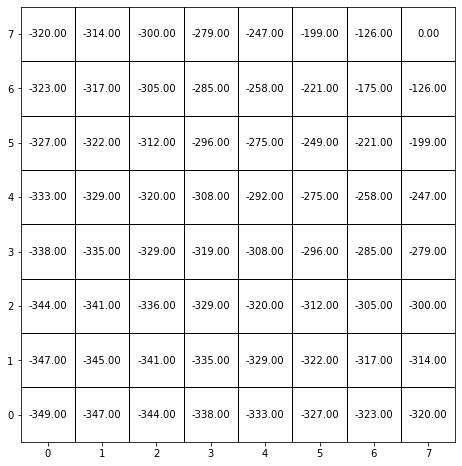

In [126]:

values = np.round(result.x, 0)
grid = values.reshape(n, n)

plt.figure(figsize=(15, 8))

cmap = plt.cm.colors.ListedColormap(['white'])


heatmap = plt.imshow(grid, cmap=cmap, interpolation='none')


for i in range(1, 8):
    plt.axhline(y=i - 0.5, color='black', linewidth=1)
    plt.axvline(x=i - 0.5, color='black', linewidth=1)

# Set y-axis ticks from 0 to 7
plt.yticks(range(8))
plt.gca().invert_yaxis()  # Invert the y-axis to have 0 at the top

# Iterate over the grid and annotate the cells with the values, respecting the order
for i in range(8):
    for j in range(8):
        value = values[j * 8 + i]  # Extract values from the flattened array
        plt.text(i, j, f'{value:.2f}', ha='center', va='center', color='black')
plt.savefig('Qn1_1.png')
plt.show()


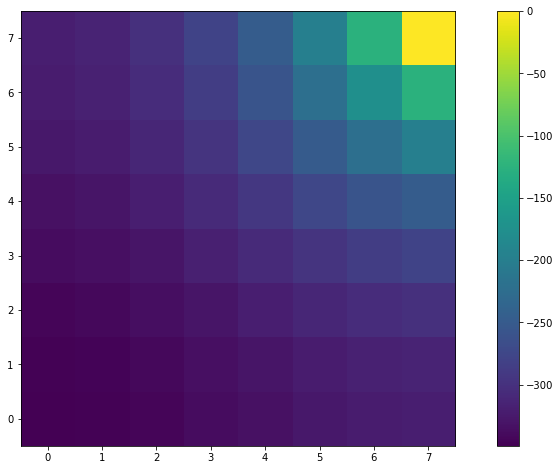

In [115]:
import numpy as np
import matplotlib.pyplot as plt
n=8
# Assuming you have 'result.x' and 'n' defined
values = np.round(result.x, 0)
grid = values.reshape(n, n)

plt.figure(figsize=(15, 8))

# Create a heatmap with the viridis colormap (uniform color)
cmap = 'viridis'

heatmap = plt.imshow(grid, cmap=cmap, interpolation='none')

# # Remove boundaries at the cells
# for i in range(1, 8):
#     plt.axhline(y=i - 0.5, color='black', linewidth=1)
#     plt.axvline(x=i - 0.5, color='black', linewidth=1)

# Set y-axis ticks from 0 to 7
plt.yticks(range(8))
plt.gca().invert_yaxis()  # Invert the y-axis to have 0 at the top

# Add a colorbar
cbar = plt.colorbar(heatmap)
plt.savefig('Qn1_2.png')
# Show the heatmap with a colorbar
plt.show()


In [44]:
def coefficients_A2(n): 
    A = np.zeros(((n*n)-1 , n*n))
    for i in range(0,n):
        for j in range(0, n):
            idx = i + j* n

            # FOUR MOVEMENTS
            if i == 1 and j == 1:  # INTERIOR POINT
                #print(idx)
                A[idx, idx] = -1
                A[idx, (i-1) + j* n] = 1/4    #left
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, i + (j-1)*n] = 1/4     #down
                A[idx, i + (j+1)*n] = 1/4     #up

            # THREE MOVEMENTS

            elif (i == n-1 and j != 0 and j != n - 1) or (i == 1 and j == 2): # RIGHT BOUNDARY
                #print(i,j)
                #print(idx)
                A[idx, idx] = -3/4
                A[idx, (i-1) + j*n] = 1/4  #left
                A[idx, i + (j-1)*n] = 1/4  #down
                A[idx, i + (j+1)*n] = 1/4  #up

            elif (i == 0 and (j == 1 or j == 2 )) or (i == 3 and (j == 3 or j == 2 )):  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -3/4
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, i + (j-1)*n] = 1/4     #down
                A[idx, i + (j+1)*n] = 1/4     #up

            elif (i == 3 and j == 1 ) or (i == 1 and  j == 0 ):  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -3/4
                A[idx, i + (j+1)*n] = 1/4     #up
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, (i-1) + j* n] = 1/4    #left

            elif i == 3 and j == 4:  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -3/4
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, (i-1) + j* n] = 1/4    #left
                A[idx, i + (j-1)*n] = 1/4     #down

            elif (i == 3 and j == 4) or (i == 2 and j == 1):  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -3/4
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, (i-1) + j* n] = 1/4    #left
                A[idx, i + (j-1)*n] = 1/4     #down

            # TWO MOVEMENTS

            elif i == 0 and j == 3:  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -1/2
                A[idx, (i+1) + j* n] = 1/4    #right
                A[idx, i + (j-1)*n] = 1/4     #down

            elif i == 1 and j == 3:  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -1/2
                A[idx, (i-1) + j* n] = 1/4    #left
                A[idx, i + (j-1)*n] = 1/4     #down

            elif i == 2 and j == 0:  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -1/2
                A[idx, (i-1) + j* n] = 1/4    #left
                A[idx, i + (j+1)*n] = 1/4     #up

            elif i==0 and j==0:  
                #print(i,j)
                #print(idx)
                A[idx, idx] = -1/2
                A[idx, (i+1) + j* n] = 1/4 #right
                A[idx, i + (j+1)*n] = 1/4  #up

            # ONE MOVEMENTS

            elif i == 4 and j == 0: 
                #print(i,j)
                #print(idx)
                A[idx, idx] = -1/4
                A[idx, i + (j+1)*n] = 1/4     #up

            elif i == 2 and j == 4:
                #print(i,j)
                #print(idx)
                A[idx, idx] = -1/4
                A[idx, (i+1) + j* n] = 1/4    #right
    A = A[np.any(A != 0, axis=1)]
    A = A[:, np.any(A != 0, axis=0)]

    return A


In [45]:
n = 5
A_ub = coefficients_A2(n)
b_ub = np.ones(n**2-6)
c = 1*np.ones(n**2-5)
b_ub.shape
bounds = [(None,0)] * (n**2 - 6)  
bounds.append((0, 0)) 
result = linprog(c, A_ub = A_ub, b_ub =b_ub , bounds=bounds, method='highs')
result.x

array([-180.99760766, -175.33253589, -165.91626794, -102.57142857,
       -182.66267943, -175.08373206, -152.5       , -112.5       ,
        -98.57142857, -187.90669856, -185.83971292,  -82.42857143,
        -76.64285714, -191.21770335, -190.52870813,  -54.14285714,
        -44.92857143,  -35.07142857,  -31.07142857,    0.        ])

In [46]:
result.fun

-2425.914217361582

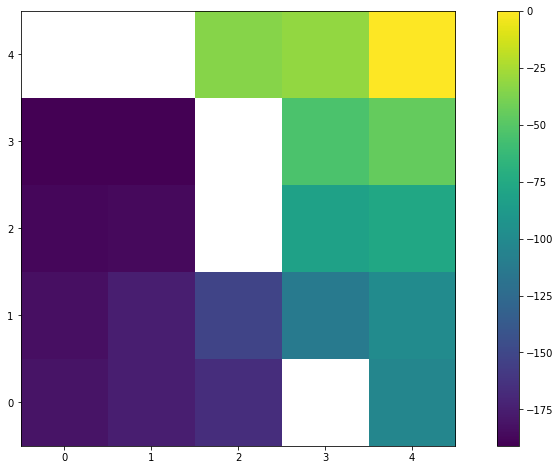

In [117]:
# Your data with NaN values
values = np.array([-180.99760766, -175.33253589, -165.91626794, np.nan, -102.57142857,
                   -182.66267943, -175.08373206, -152.5, -112.5, -98.57142857,
                   -187.90669856, -185.83971292, np.nan, -82.42857143, -76.64285714,
                   -191.21770335, -190.52870813, np.nan, -54.14285714, -44.92857143,
                   np.nan, np.nan, -35.07142857, -31.07142857, 0.0])

# Replace NaN values with a grey color (you can adjust the color as needed)
values = np.where(np.isnan(values), np.nan, values)
n =5
# Round the values for better display
values = np.round(values, 0)
grid = values.reshape(n, n)

plt.figure(figsize=(15, 8))

# Create a heatmap with the viridis colormap (uniform color)
cmap = 'viridis'

heatmap = plt.imshow(grid, cmap=cmap, interpolation='none')

# # Remove boundaries at the cells
# for i in range(1, 8):
#     plt.axhline(y=i - 0.5, color='black', linewidth=1)
#     plt.axvline(x=i - 0.5, color='black', linewidth=1)

# Set y-axis ticks from 0 to 7
plt.yticks(range(n))
plt.gca().invert_yaxis()  # Invert the y-axis to have 0 at the top

# Add a colorbar
cbar = plt.colorbar(heatmap)
plt.savefig('Qn2_2.png')
# Show the heatmap with a colorbar
plt.show()


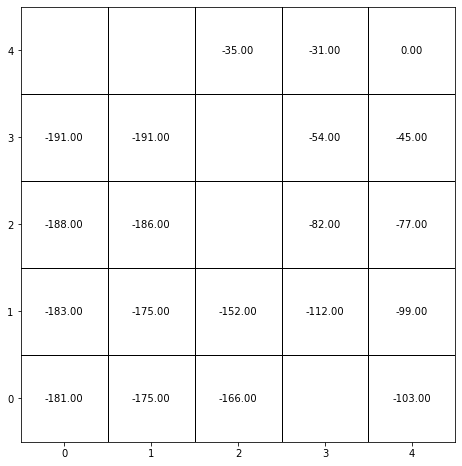

In [119]:

values = np.array([-180.99760766, -175.33253589, -165.91626794, np.nan, -102.57142857,
                   -182.66267943, -175.08373206, -152.5, -112.5, -98.57142857,
                   -187.90669856, -185.83971292, np.nan, -82.42857143, -76.64285714,
                   -191.21770335, -190.52870813, np.nan, -54.14285714, -44.92857143,
                   np.nan, np.nan, -35.07142857, -31.07142857, 0.0])

# Replace NaN values with a grey color (you can adjust the color as needed)
values = np.where(np.isnan(values), np.nan, values)

# Round the values for better display
values = np.round(values, 0)

# Set the grid size (assuming it's 5x5)
n = 5
grid = values.reshape(n, n)

plt.figure(figsize=(15, 8))

# Create a custom colormap with a single color (uniform white)
cmap = plt.cm.colors.ListedColormap(['white'])

# Create a heatmap with the custom colormap
heatmap = plt.imshow(grid, cmap=cmap, interpolation='none')

# Add black lines to separate cells
for i in range(1, 5):
    plt.axhline(y=i - 0.5, color='black', linewidth=1)
    plt.axvline(x=i - 0.5, color='black', linewidth=1)

# Set y-axis ticks from 0 to 7
plt.yticks(range(5))
plt.gca().invert_yaxis()  # Invert the y-axis to have 0 at the top

# Iterate over the grid and annotate the cells with the values, respecting the order
for i in range(n):
    for j in range(n):
        value = grid[j, i]  # Extract values from the grid
        if not np.isnan(value):
            plt.text(i, j, f'{value:.2f}', ha='center', va='center', color='black')
plt.savefig('Qn2_1.png')
plt.show()


In [128]:
import numpy as np

# Function to check if the robot is at the goal state (7, 7)
def is_goal(state):
    return state == (7, 7)

# Function to simulate the robot's movement
def move_robot(state, button_mapping):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    move = np.random.choice(len(directions), p=button_mapping)
    new_state = (state[0] + directions[move][0], state[1] + directions[move][1])
    # Ensure the robot stays within the bounds of the chessboard
    new_state = (max(0, min(7, new_state[0])), max(0, min(7, new_state[1])))
    return new_state

# Function to perform one simulation run
def simulate_run():
    state = (0, 0)
    button_mapping = np.random.permutation([0.25, 0.25, 0.25, 0.25])
    num_moves = 0
    while not is_goal(state):
        state = move_robot(state, button_mapping)
        num_moves += 1
    return num_moves

# Number of simulations
num_simulations = 500
total_moves = 0

# Perform Monte Carlo simulations
for _ in range(num_simulations):
    total_moves += simulate_run()

# Calculate the expected value
expected_value = total_moves / num_simulations
print("Expected Value:", expected_value)


Expected Value: 339.974


Expected Value: 18969.198


In [152]:
import numpy as np

def goal(state, n):
    return state == (n - 1, n - 1)

def moves(state, actions, transition_prob, n):
    move = np.random.choice(len(actions), p=transition_prob)
    new_state = (state[0] + actions[move][0], state[1] + actions[move][1])
    new_state = (max(0, min(n - 1, new_state[0])), max(0, min(n - 1, new_state[1])))
    return new_state

def is_valid(state, n, excluded_states):
    return state not in excluded_states and 0 <= state[0] < n and 0 <= state[1] < n

def simulations(initial_state, n, excluded_states):
    if not is_valid(initial_state, n, excluded_states):
        return float('inf')  # Exclude starting from an excluded state
    
    state = initial_state
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    transition_prob = np.random.permutation([0.25, 0.25, 0.25, 0.25])
    num_moves = 0
    while not goal(state, n):
        next_state = moves(state, actions, transition_prob, n)
        if not is_valid(next_state, n, excluded_states):
            return float('inf')  # Exclude moving into an excluded state
        state = next_state
        num_moves += 1
    return num_moves

def MC(num_simulations, n):
    total_moves = 0
    excluded_states = {(0, 3), (2, 2), (2, 3), (0, 4), (1, 4)}
    
    for i in range(n):
        for j in range(n):
            initial_state = (i, j)
            if is_valid(initial_state, n, excluded_states):
                for _ in range(num_simulations):
                    total_moves += simulations(initial_state, n, excluded_states)
    
    return total_moves / num_simulations

expected_value = MC(500, 5)
print("Expected Value:", expected_value)


Expected Value: inf


SyntaxError: invalid syntax (3204945582.py, line 8)

In [ ]:
def goal(state, n):
    return state == (n - 1, n - 1)

def moves(state, actions, transition_prob, n):
    move = np.random.choice(len(actions), p=transition_prob)
    new_state = (state[0] + actions[move][0], state[1] + actions[move][1])
    new_state = (max(0, min(n - 1, new_state[0])), max(0, min(n - 1, new_state[1]))
    return new_state

def simulations(initial_state, n, excluded_states):
    state = initial_state
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    transition_prob = np.random.permutation([0.25, 0.25, 0.25, 0.25])
    num_moves = 0
    while not goal(state, n):
        state = moves(state, actions, transition_prob, n)
        num_moves += 1
        if state in excluded_states:
            return float('inf')  # Exclude invalid states
    return num_moves
def MC(num_simulations, n):
    total_moves = 0
    excluded_states = {(0, 3), (2, 2), (2, 3), (0, 4), (1, 4)}
    
    for i in range(n):
        for j in range(n):
            initial_state = (i, j)
            if initial_state not in excluded_states:
                for _ in range(num_simulations):
                    total_moves += simulations(initial_state, n, excluded_states)
    
    return total_moves / num_simulations

expected_value = MC(500, 5)
print("Expected Value:", expected_value)

In [160]:
import numpy as np

def goal(state, n):
    return state == (n - 1, n - 1)

def moves(state, actions, transition_prob, n):
    move = np.random.choice(len(actions), p=transition_prob)
    new_state = (state[0] + actions[move][0], state[1] + actions[move][1])
    new_state = (max(0, min(n - 1, new_state[0])), max(0, min(n - 1, new_state[1])))
    return new_state

def is_valid(state, n, excluded_states):
    return state not in excluded_states and 0 <= state[0] < n and 0 <= state[1] < n

def simulations(initial_state, n, excluded_states):
    num_moves = 0
    state = initial_state
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    transition_prob = np.random.permutation([0.25, 0.25, 0.25, 0.25])
    
    while not goal(state, n):
        next_state = moves(state, actions, transition_prob, n)
        if not is_valid(next_state, n, excluded_states):
            # If the next move is an excluded state, the robot stays in its location,
            # and we still count the move.
            num_moves += 1
            continue
        state = next_state
        num_moves += 1
    return num_moves

def simulations(initial_state, n, excluded_states):
    num_moves = 0
    state = initial_state
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    transition_prob = np.random.permutation([0.25, 0.25, 0.25, 0.25])
    
    while not goal(state, n):
        next_state = moves(state, actions, transition_prob, n)
        if not (0 <= next_state[0] < n and 0 <= next_state[1] < n):
            # If the next move is out of the grid, count it and stay in the initial position.
            num_moves += 1
            continue
        if not is_valid(next_state, n, excluded_states):
            # If the next move is an excluded state, the robot stays in its location and is counted.
            num_moves += 1
            continue
        state = next_state
        num_moves += 1
    return num_moves



def MC(num_simulations, n):
    total_moves = 0
    excluded_states = {(0, 3), (2, 2), (2, 3), (0, 4), (1, 4)}
    
    for i in range(n):
        for j in range(n):
            initial_state = (i, j)
            if is_valid(initial_state, n, excluded_states):
                for _ in range(num_simulations):
                    total_moves += simulations(initial_state, n, excluded_states)
    
    return total_moves / num_simulations

expected_value = MC(500, 5)
print("Expected Value:", expected_value)


Expected Value: 2115.222
